<a href="https://colab.research.google.com/github/jefrnm/contoh/blob/master/ANN%26TENSOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [874]:
!pip install tensorflow==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [875]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [876]:
print(tf.__version__)

2.1.0


In [877]:
dataset = pd.read_csv('coba baru final 2.csv')
dataset.head(82)

,No,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,Tabel
0,1,6,-7,81,49,-30,15,152,-370,-1139,...,685,-529,-1274,407,-317,-401,820,1012,745,gempa
1,2,161,-149,-542,-529,1605,851,-1255,-1274,649,...,-3,-120,-47,235,-552,288,-507,136,262,non-gempa
2,3,15,-62,-15,36,16,27,139,-152,507,...,29,182,1192,-1043,-1419,1268,-255,-994,1280,gempa
3,4,617,455,396,-694,-293,-750,1098,-69,-342,...,-429,-1021,-73,-80,536,1100,145,-330,-471,non-gempa
4,5,-7,44,-10,-30,71,348,1369,129,623,...,1191,2855,1123,1064,-75,285,2237,2409,-1333,gempa
5,6,-1354,357,-107,728,365,-304,-722,-58,-862,...,-744,-400,655,125,-669,283,-111,-633,136,non-gempa
6,7,27,57,47,-25,-88,191,-139,47,-2797,...,-1448,1297,607,-1019,-354,995,1050,-362,-661,gempa
7,8,-1783,-2884,1012,453,-519,1467,-1698,-244,2051,...,-733,-664,929,253,312,342,77,1109,1416,non-gempa
8,9,-23,25,-27,-52,-53,-90,-315,-161,-393,...,-980,-120,729,665,-183,-1771,-149,-1074,135,gempa
9,10,-208,1727,585,-1884,-894,607,422,920,-330,...,372,-324,-340,58,198,309,12,-331,215,non-gempa


In [878]:
x = dataset.drop(labels=['No','Tabel'], axis = 1)
x.head(80)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,6,-7,81,49,-30,15,152,-370,-1139,16,...,64,685,-529,-1274,407,-317,-401,820,1012,745
1,161,-149,-542,-529,1605,851,-1255,-1274,649,766,...,-134,-3,-120,-47,235,-552,288,-507,136,262
2,15,-62,-15,36,16,27,139,-152,507,-1190,...,-680,29,182,1192,-1043,-1419,1268,-255,-994,1280
3,617,455,396,-694,-293,-750,1098,-69,-342,217,...,88,-429,-1021,-73,-80,536,1100,145,-330,-471
4,-7,44,-10,-30,71,348,1369,129,623,1858,...,725,1191,2855,1123,1064,-75,285,2237,2409,-1333
5,-1354,357,-107,728,365,-304,-722,-58,-862,2223,...,620,-744,-400,655,125,-669,283,-111,-633,136
6,27,57,47,-25,-88,191,-139,47,-2797,-1806,...,-608,-1448,1297,607,-1019,-354,995,1050,-362,-661
7,-1783,-2884,1012,453,-519,1467,-1698,-244,2051,2320,...,-305,-733,-664,929,253,312,342,77,1109,1416
8,-23,25,-27,-52,-53,-90,-315,-161,-393,934,...,137,-980,-120,729,665,-183,-1771,-149,-1074,135
9,-208,1727,585,-1884,-894,607,422,920,-330,369,...,264,372,-324,-340,58,198,309,12,-331,215


In [879]:
y = dataset['Tabel']
y.head()

0        gempa
1    non-gempa
2        gempa
3    non-gempa
4        gempa
Name: Tabel, dtype: object

In [880]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [881]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

In [882]:
print(y_test)

[1 0 0 1 0 0 0 1 1 1]


In [883]:
def one_hot(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
#y_train_1 = one_hot(y_train)
#y_test_1 = one_hot(y_test)
#y_val_1 = one_hot(y_val)
#x_train_1 = K.cast_to_floatx (x_train)
#x_test_1 = K.cast_to_floatx (x_test)
#x_val_1 = K.cast_to_floatx (x_val)

#print("jumlah data train : ",len(x_train_1))
#print("jumlah data test  : ",len(x_test_1))
#print("jumlah data val   : ",len(x_val_1))

In [884]:
model= tf.keras.Sequential()
model.add(layers.Dense(8, activation='relu', input_dim=100))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [885]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [886]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 8)                 808       
_________________________________________________________________
dense_141 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_142 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 11        
Total params: 1,019
Trainable params: 1,019
Non-trainable params: 0
_________________________________________________________________


In [887]:
history = model.fit(x_train,y_train, epochs=100,batch_size=1,verbose=2,
                    validation_data=(x_val,y_val))

Train on 30 samples, validate on 10 samples
Epoch 1/100
30/30 - 1s - loss: 192.4953 - accuracy: 0.5000 - val_loss: 49.1307 - val_accuracy: 0.8000
Epoch 2/100
30/30 - 0s - loss: 52.3428 - accuracy: 0.6333 - val_loss: 51.5999 - val_accuracy: 0.7000
Epoch 3/100
30/30 - 0s - loss: 28.0836 - accuracy: 0.6667 - val_loss: 57.6324 - val_accuracy: 0.7000
Epoch 4/100
30/30 - 0s - loss: 13.7501 - accuracy: 0.6667 - val_loss: 63.2959 - val_accuracy: 0.7000
Epoch 5/100
30/30 - 0s - loss: 5.3813 - accuracy: 0.8000 - val_loss: 64.2786 - val_accuracy: 0.7000
Epoch 6/100
30/30 - 0s - loss: 1.3304 - accuracy: 0.8333 - val_loss: 64.2596 - val_accuracy: 0.7000
Epoch 7/100
30/30 - 0s - loss: 0.7443 - accuracy: 0.9000 - val_loss: 73.4353 - val_accuracy: 0.7000
Epoch 8/100
30/30 - 0s - loss: 1.4522 - accuracy: 0.8000 - val_loss: 59.9702 - val_accuracy: 0.7000
Epoch 9/100
30/30 - 0s - loss: 0.9869 - accuracy: 0.9333 - val_loss: 59.7494 - val_accuracy: 0.7000
Epoch 10/100
30/30 - 0s - loss: 0.6469 - accuracy: 

Training Accuracy  : 100.00%
Validation Accuracy: 70.00%


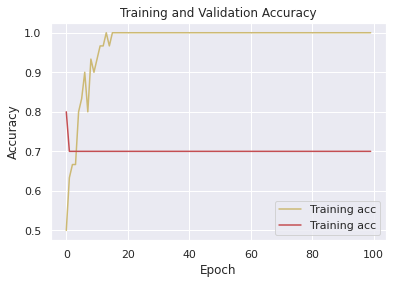

In [888]:
from matplotlib import pyplot as plt
scores_train = model.evaluate(x_train, y_train, verbose = 0)
scores_validation = model.evaluate(x_val, y_val, verbose = 0)
print("Training Accuracy  : %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc,'y',label = 'Training acc')
plt.plot(val_acc,'r',label = 'Training acc')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

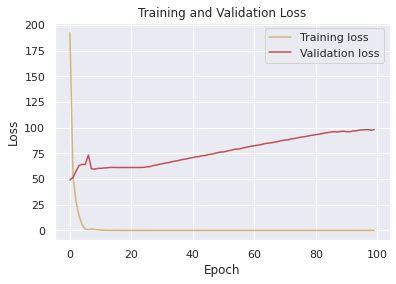

In [889]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss,'y',label = 'Training loss')
plt.plot(val_loss,'r',label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [890]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
pred_result = pd.DataFrame(list(zip(y_test, y_pred)), columns=['Test', 'Predicted'])
pred_result

,Test,Predicted
0,1,[0]
1,0,[0]
2,0,[0]
3,1,[1]
4,0,[0]
5,0,[1]
6,0,[0]
7,1,[1]
8,1,[1]
9,1,[1]


Accuracy: 80.00%


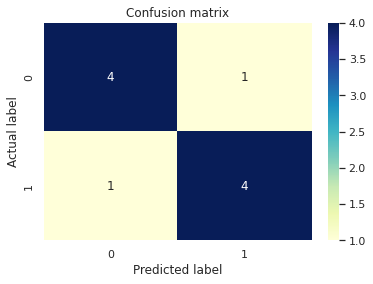

In [891]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
sns.set()

p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy: %.2f%%" % (score * 100.0))

In [892]:
# KONVERT MODEL KERAS KE MODEL TFLITE
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open("ANN.tflite" , 'wb').write(tflite_model)

6012

In [893]:
import os
basic_model_size = os.path.getsize("ANN.tflite")
print("Basic model is %d bytes" % basic_model_size)

Basic model is 6012 bytes


In [894]:
!sudo apt-get update
!sudo apt-get install xxd

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [895]:
!xxd -i ANN.tflite > ANN.cc
!cat ANN.cc

unsigned char ANN_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00,
  0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x28, 0x17, 0x00, 0x00, 0x18, 0x11, 0x00, 0x00, 0x00, 0x11, 0x00, 0x00,
  0x34, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x80, 0xe9, 0xff, 0xff, 0x08, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73,
  0x69, 0x6f, 0x6e, 0x00, 0x10, 0x00, 0x00, 0x00, 0xc0, 0x10, 0x00, 0x00,
  0xac, 0x10, 0x00, 0x00, 0x04, 0x0f, 0x00, 0x00, 0xcc, 0x0e, 0x00, 0x00,
  0x7c, 0x0d, 0x00, 0x00, 0x74, 0x0d, 0x00, 0x00, 0xe4, 0x00, 0x00, 0x00,
  0xdc, 0x00, 0x00, 0x00, 0xac, 0x00, 0x00, 0x00, 0x74, 0x00, 0x00, 0x00,
  0x6c, 0x00, 0x00, 0x00, 0x64, 0x00, 0x00, 0x00, 0x5c, 0x00, 0x00, 0x00,
  0x24,